In [153]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from copy import deepcopy

In [154]:
#reading dataset 
df= pd.read_csv('Iris Dataset.csv')

In [155]:
#printing dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [156]:
#finding different class labels 
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [157]:
#finding the dimension of the dataset
df.shape

(150, 6)

In [158]:
#checking for Null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [159]:
#separating the data and target
x=pd.DataFrame(df,columns=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm'])
y=pd.DataFrame(df,columns=['Species'])

In [160]:
#printing the data
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [161]:
#printing the target-species
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


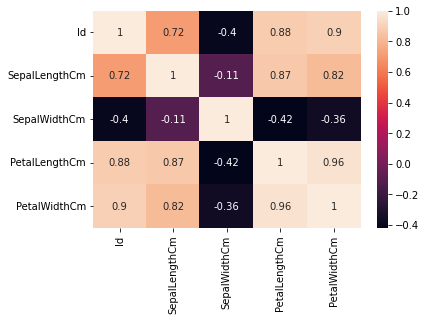

In [162]:
#finding correlation of features 
correl=df.corr()
#creating a heat map to interpret the correlation data
sns.heatmap(correl,annot=True)

Text(0.5, 1.0, 'Scatter Plot')

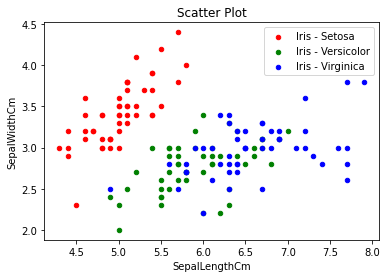

In [163]:
#creating a scatter plot to visulise the target
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm',color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm',color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm',color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

## data preprocessing

In [164]:
#finding different class labels 
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [165]:
#dropping unnecessary columns

df = pd.read_csv('Iris Dataset.csv')
df = df.drop(['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [166]:
#Label Encoding - for encoding categorical features into numerical ones
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [167]:
#printing the whole dataframe
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [168]:
#checking the dimension of the dataset
df.shape

(150, 5)

In [169]:
#converting dataframe to np array 
data = df.values 

X=data [:, 0:5]
Y= data [: , -1]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(150, 5)
(150,)
(112, 5)
(112,)
(38, 5)
(38,)


# MODEL TRAINING

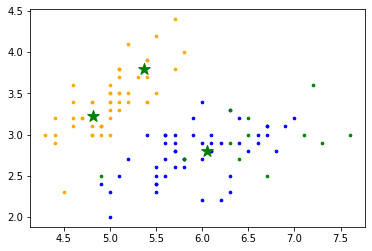

In [170]:
# Number of clusters
K = 3
# Number of training data
n = train_x.shape[0]
# Number of features in the data
c = train_x.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(train_x, axis = 0)
std = np.std(train_x, axis = 0)
centers = np.random.randn(K,c)*std + mean

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(K):
        distances[:,i] = np.linalg.norm(train_x - centers_new[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(train_x[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

# Plot the data
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(train_x[i, 0], train_x[i,1], s=7, color = colors[int(train_y[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)